In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [6]:
df = pd.read_csv('../DATA/UK_foods.csv',index_col='Unnamed: 0')

In [7]:
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


In [8]:
df.transpose()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


<AxesSubplot:>

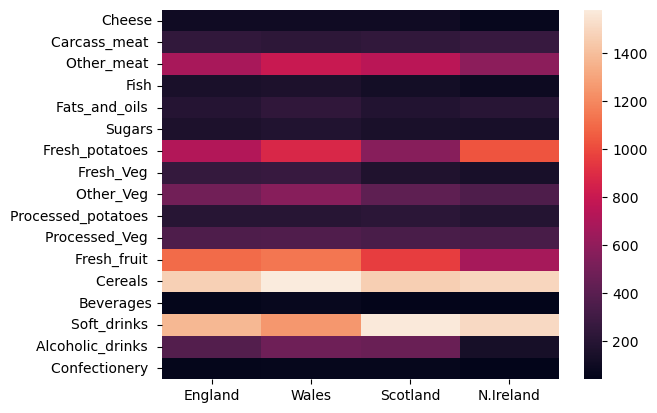

In [9]:
sns.heatmap(df)

In [10]:
models = tf.keras.models
layers = tf.keras.layers

In [11]:
df.shape

(17, 4)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
scaled_df = scaler.fit_transform(df.transpose().values)

In [15]:
scaled_df

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

In [16]:
encoder = models.Sequential([
    layers.Dense(17, input_shape=[17], activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(2, activation='relu'),
])

In [17]:
decoder = models.Sequential([
    layers.Dense(4, input_shape=[2], activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(17, activation='relu'),
])

In [18]:
autoencoder = models.Sequential([encoder, decoder])
autoencoder.compile(loss='mse', optimizer='adam')

In [19]:
autoencoder.fit(scaled_df, scaled_df, epochs=15)

Epoch 1/15

1/1 [==============================] - 2s 2s/step - loss: 0.4014
Epoch 2/15
1/1 [==============================] - 0s 11ms/step - loss: 0.3987
Epoch 3/15
1/1 [==============================] - 0s 16ms/step - loss: 0.3959
Epoch 4/15
1/1 [==============================] - 0s 21ms/step - loss: 0.3931
Epoch 5/15
1/1 [==============================] - 0s 24ms/step - loss: 0.3903
Epoch 6/15
1/1 [==============================] - 0s 14ms/step - loss: 0.3875
Epoch 7/15
1/1 [==============================] - 0s 18ms/step - loss: 0.3848
Epoch 8/15
1/1 [==============================] - 0s 21ms/step - loss: 0.3821
Epoch 9/15
1/1 [==============================] - 0s 10ms/step - loss: 0.3794
Epoch 10/15
1/1 [==============================] - 0s 11ms/step - loss: 0.3767
Epoch 11/15
1/1 [==============================] - 0s 19ms/step - loss: 0.3740
Epoch 12/15
1/1 [==============================] - 0s 18ms/step - loss: 0.3712
Epoch 13/15
1/1 [==============================] - 0s 25ms/ste

In [20]:
embed_2dim = encoder.predict(scaled_df)

1/1 [==============================] - 0s 135ms/step


In [21]:
embed_2dim

array([[0.        , 0.56343544],
       [0.        , 0.91777176],
       [0.        , 0.6503911 ],
       [0.        , 0.34588784]], dtype=float32)

In [22]:
df.transpose().index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [23]:
newdf = pd.DataFrame(embed_2dim, index=df.transpose().index, columns=['C1', 'C2'])

In [24]:
newdf

,C1,C2
England,0.0,0.563435
Wales,0.0,0.917772
Scotland,0.0,0.650391
N.Ireland,0.0,0.345888


In [28]:
newdf = newdf.reset_index()

<AxesSubplot:xlabel='C1', ylabel='C2'>

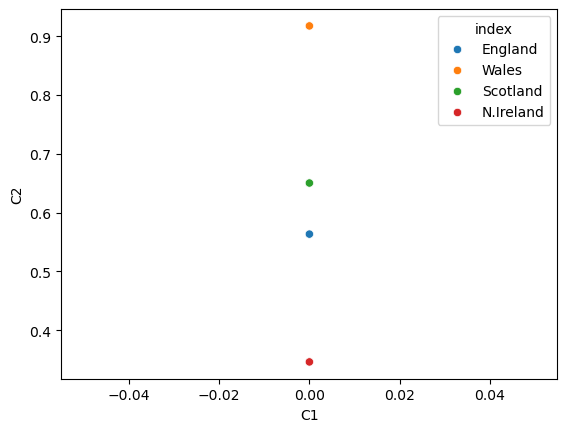

In [29]:
sns.scatterplot(newdf, x='C1', y='C2', hue='index')